# Convolutional Neural Networks

In this discussion, we will specifically focus on Convolutional Neural Networks. 

The Convolutional neural networks are regularized versions of multilayer perceptron (MLP). They were developed based on the working of the neurons of the animal visual cortex.

![alt text](092756.png)

Convolutional Neural Networks (CNNs) are a class of deep neural networks, highly effective for analyzing visual imagery and are widely used in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, and other types of cognitive tasks. CNNs are particularly tailored to process data that has a grid-like topology, such as images, which can be thought of as 2D grids of pixels.

Key Components of CNNs: 

1. $\textbf{Convolutional Layers}$: The core building block of a CNN. The convolutional layer applies filters (or kernels) to the input image to create feature maps. These filters slide (or "convolve") across the input image, computing dot products between the entries of the filter and the input at any position. This process captures the spatial dependencies in the image by recognizing patterns, such as edges, corners, textures, etc.
2. $\textbf{ReLU (Rectified Linear Unit) Layer}$: After each convolution operation, it is common to apply a nonlinear layer (or activation function) like ReLU. ReLU introduces non-linearity to the system, making it capable of learning more complex patterns. It works by replacing all negative pixel values in the feature map with zero.
3. $\textbf{Pooling (Subsampling or Down-sampling) Layers}$: Pooling layers reduce the dimensions of the data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Max pooling and average pooling are common techniques used to reduce the spatial size of the representation, to reduce the amount of parameters and computation in the network, and also to make the detection of features invariant to scale and orientation changes.
4. $\textbf{Fully Connected (FC) Layers}$: Towards the end of the network, CNNs may have one or more fully connected layers. Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular neural networks. Their role is to take the high-level filtered images (learned features) from the previous layers to determine which features most correlate with a particular class.
5. $\textbf{Softmax or Sigmoid Layer}$: The final layer, typically, uses a softmax or sigmoid function (depending on the task) to map the output into a probability distribution over the classes (for classification tasks) or a continuous output (for regression tasks).

The foundational work leading to the development of CNNs can be traced back to the pioneering experiments conducted by David Hubel and Torsten Wiesel in the late 1950s and early 1960s. Through their research on the visual cortex of cats, Hubel and Wiesel discovered that the visual cortex contains neurons that are highly specialized for detecting edges, shapes, and movements in specific orientations and locations within the visual field. They identified two types of cells:

1. Simple cells, which respond maximally to specific edge orientations and locations within their receptive field.
2. Complex cells, which have larger receptive fields and are less sensitive to the exact location of the edges, providing a degree of spatial invariance.

Their work demonstrated that the visual processing system in the brain hierarchically organizes visual information, starting from simple features (like edges) and progressively integrating them into more complex patterns (like shapes and objects). This hierarchical processing model is a key principle behind the design of CNNs, where the layers of the network progressively extract and combine features from raw input images to make sense of them.

Explanation Link: https://towardsdatascience.com/basics-of-the-classic-cnn-a3dce1225add

Important things to take from article:

1. How the chosen kernel extracts information from input images.
2. How the dimensionality of the data changes as it progresses through the network.
3. the use of Convolutional layers, Pooling layers and softmax/sigmoid layers at the end.

### Coding tutorial for CNN using Keras framework

In [1]:
# # Ensure TensorFlow 2.x is installed
# !pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

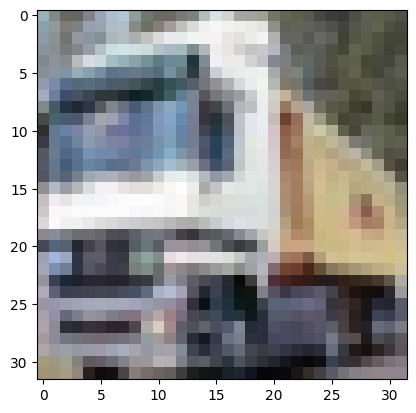

In [4]:
plt.imshow(train_images[1])

In [5]:
print(train_labels[1])

[9]


In [6]:
## Define the CNN model to use

model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10)
])

In [7]:
# Compile the model with the optimizer of your choice, loss function and metrics to print while training. 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# now fit the model to training data

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5122 - accuracy: 0.4506 - val_loss: 1.2513 - val_accuracy: 0.5538
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1350 - accuracy: 0.5992 - val_loss: 1.0922 - val_accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9819 - accuracy: 0.6547 - val_loss: 0.9629 - val_accuracy: 0.6601
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8802 - accuracy: 0.6937 - val_loss: 0.9498 - val_accuracy: 0.6731
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8062 - accuracy: 0.7176 - val_loss: 0.8789 - val_accuracy: 0.6990
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7418 - accuracy: 0.7406 - val_loss: 0.9232 - val_accuracy: 0.6871
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6916 - accuracy: 0.7588 - val_loss: 0.8667 -

In [9]:
# Use this command to print the histoy of all your metrics over epochs
history.history

{'loss': [1.5121649503707886,
  1.1349989175796509,
  0.9818870425224304,
  0.8802013993263245,
  0.8061667084693909,
  0.7418389320373535,
  0.6915522813796997,
  0.6522907614707947,
  0.606726348400116,
  0.5694782137870789],
 'accuracy': [0.45058000087738037,
  0.5992400050163269,
  0.6547200083732605,
  0.6936799883842468,
  0.7175800204277039,
  0.7406200170516968,
  0.7587800025939941,
  0.772159993648529,
  0.7875999808311462,
  0.8011199831962585],
 'val_loss': [1.251250147819519,
  1.0922393798828125,
  0.9629251956939697,
  0.9498432874679565,
  0.8789255619049072,
  0.9231979250907898,
  0.8667071461677551,
  0.8925991058349609,
  0.8568987250328064,
  0.8533753752708435],
 'val_accuracy': [0.5537999868392944,
  0.6227999925613403,
  0.660099983215332,
  0.6730999946594238,
  0.6990000009536743,
  0.6870999932289124,
  0.7049999833106995,
  0.6998999714851379,
  0.7121999859809875,
  0.7160000205039978]}

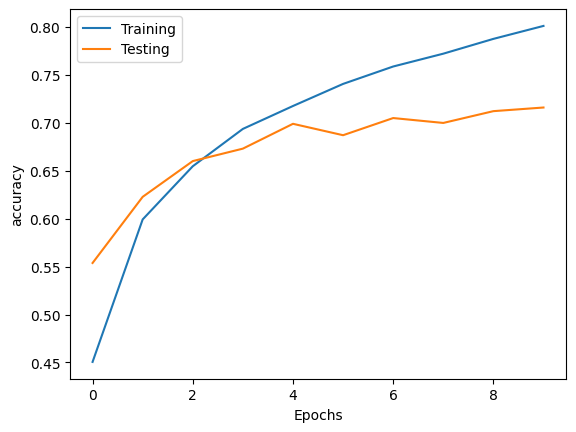

In [10]:
plt.plot(range(10), history.history['accuracy'], label='Training')
plt.plot(range(10), history.history['val_accuracy'], label='Testing')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
model.save('model.keras')

![alt text](model.keras.png)

Above image representation created with Netron